# Лабораторная работа № 1 - Основы МО, линейная регрессия


Исходный датасет был выбран на сайте Kaggle - (`https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who`)


<a name="оглавление"></a>

**Оглавление**


[Глава №1 - Импорт бибилиотек](#Импорт_бибилиотек)

[Глава №2 - Описание датасета](#Описание_датасета)

[Глава №3 - Анализ датасета](#Анализ_датасета)

[Глава №4 - Создание модели](#Создание_модели)

[Глава №5 - Обучение модели / fine tuning](#fine_tuning)

[Глава №6 - Сбор результатов обучения](#Сбор_результатов_обучения)

[Глава №7 - Выводы и улучшение](#Выводы_и_улучшение)


<a name="Импорт_библиотек"></a>

## Глава №1 - Импорт библиотек

[Оглавление](#оглавление)

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<a name="Описание_датасета"></a>

## Глава №2 - Описание датасета

[Оглавление](#оглавление)

| **Особенность**                         | **Описание**                                                                                          |
|----------------------------------------|-------------------------------------------------------------------------------------------------------|
| **Страна**                             (Country)                          | Страны собраны с одного и того же веб-сайта репозитория данных ВОЗ.                                 |
| **Год**                                (Year)                             | Годы с 2013 по 2000.                                                                                |
| **Статус**                             (Status)                           | Статус страны: развивающаяся или развитая.                                                          |
| **Ожидаемая продолжительность жизни**  (Life expectancy)                  | Ожидаемая продолжительность жизни в возрасте, на который мы нацелены.                               |
| **Смертность среди взрослых**          (Adult Mortality)     | Уровень смертности среди взрослых обоих полов (вероятность смерти в возрасте от 15 до 60 лет на 1000 населения). |
| **Смертность среди новорожденных**     (Infant deaths)                    | Количество смертей новорожденных на 1000 населения.                                                 |
| **Алкоголь**                           (Alcohol)                          | Употребление алкоголя на душу населения (15+) в литрах чистого алкоголя.                            |
| **Процентные расходы**                 (Percentage expenditure)           | Расходы на здравоохранение как процент от валового внутреннего продукта на душу населения (%).      |
| **Гепатит B**                          (Hepatitis B)                      | Уровень иммунизации против гепатита B (HepB) среди детей в возрасте 1 года (%).                     |
| **Корь**                               (Measles)                          | Количество зарегистрированных случаев кори на 1000 населения.                                       |
| **Индекс массы тела (ИМТ)**            (BMI)                              | Средний индекс массы тела всего населения.                                                          |
| **Смертность среди детей младше пяти** (under-five deaths)                | Количество смертей среди детей младше пяти лет на 1000 населения.                                   |
| **Полиомиелит**                        (Polio)                            | Уровень иммунизации против полиомиелита (Pol3) среди детей в возрасте 1 года (%).                   |
| **Общие расходы**                      (Total expenditure)                | Общие государственные расходы на здравоохранение как процент от общих государственных расходов (%). |
| **Дифтерия**                           (Diphtheria)                       | Уровень иммунизации против дифтерии, столбняка и коклюша (DTP3) среди детей в возрасте 1 года (%).  |
| **ВИЧ/СПИД**                           (HIV/AIDS)                         | Смертность от ВИЧ/СПИДа на 1000 живорождений (0-4 года).                                            |
| **ВВП**                                (GDP)                              | Валовой внутренний продукт на душу населения (в долларах США).                                      |
| **Население**                          (Population)                       | Население страны.                                                                                   |
| **Тонкость среди детей 1-19 лет**      (thinness 1-19 years)              | Преобладание тонкости среди детей и подростков в возрасте от 10 до 19 лет (%).                      |
| **Тонкость среди детей 5-9 лет**       (thinness 5-9 years)               | Преобладание тонкости среди детей в возрасте от 5 до 9 лет (%).                                     |
| **Состав доходов ресурсов**            (Income composition of resources)  | Индекс человеческого развития по составу доходов ресурсов (индекс от 0 до 1).                       |
| **Образование**                         (Schooling)                       | Количество лет обучения (в годах).                                                                  |

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Читаем датасет
df = pd.read_csv('Life Expectancy Data.csv')

df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Получаем информацию об датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

''

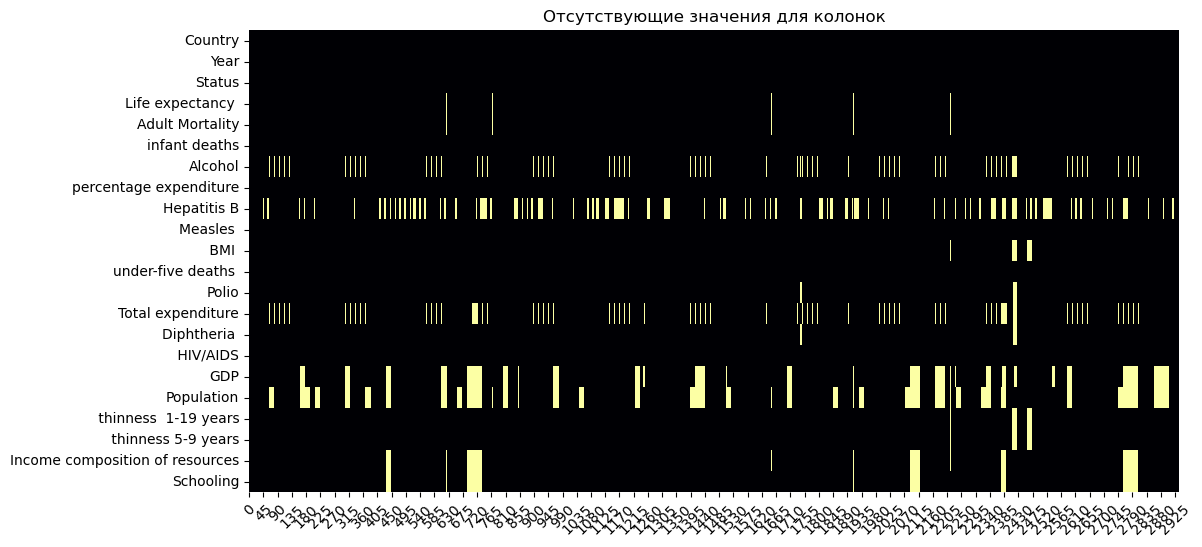

In [ ]:
# Помечаем пропущенные значения для наших колонок
df.isnull().sum()

plt.figure(figsize = (12,6))
sns.heatmap(df.T.isnull(), cbar = False,
                         cmap = 'inferno').set_title("Отсутствующие значения для колонок")
plt.xticks(rotation=45)
;

Изучим наш датасет построив графики распределения:
  
1)  Ожидаемой продолжительности жизни (гистограмма)
2)  Ожидаемой продолжительности жизни (боксплот)
3)  Тепловая карта кореляции
4)  

''

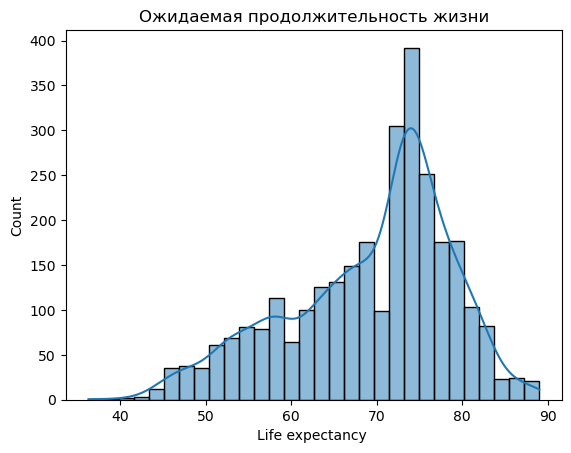

In [ ]:
# Построим гистрограмму распределения - Ожидаемой продолжительности жизни
sns.histplot(df['Life expectancy '], kde=True).set_title('Ожидаемая продолжительность жизни')
;

''

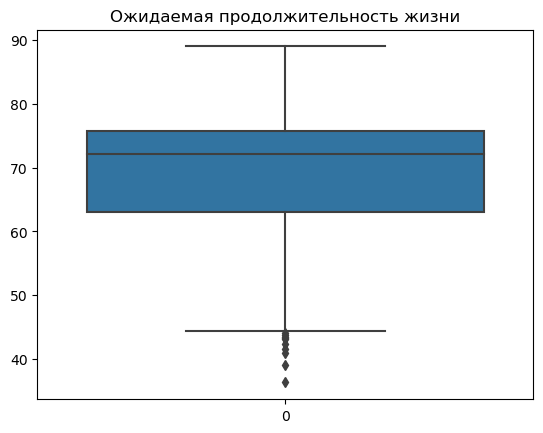

In [ ]:
# Построим boxplot, чтобы посмотеть наличие выбросов
sns.boxplot(df['Life expectancy ']).set_title('Ожидаемая продолжительность жизни')
;

C:\Users\goltsovmn\AppData\Local\Temp\ipykernel_6076\1624545345.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='inferno').set_title('heatmap карты корреляции')


''

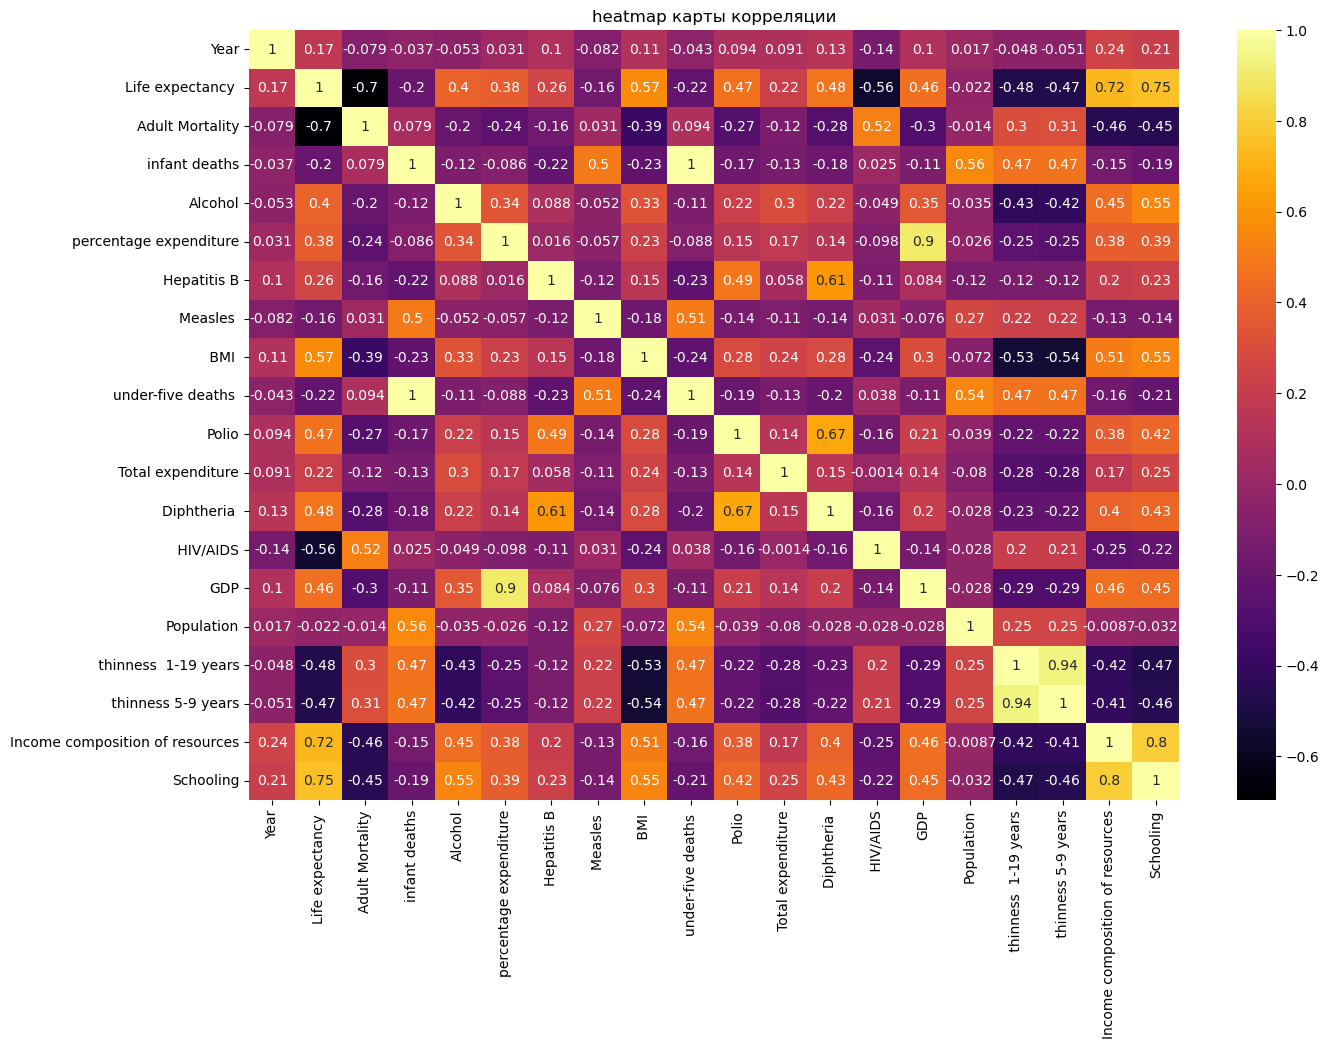

In [ ]:
# Построим тепловую карту кореляций переменных
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='inferno').set_title('heatmap карты корреляции')
;

In [ ]:
# Что нибудь ещё подсмотреть тут
# https://www.kaggle.com/code/varunsaikanuri/life-expectancy-visualization

# sns.scatterplot(df,y='Adult Mortality',x='Life expectancy ',hue='Country', alpha=0.6)
# ;

<a name="Анализ_датасета"></a>

## Глава №3 - Анализ датасета

[Оглавление](#оглавление)

Мы знаем, что в нашем датасете имеются пропущенные значения. Попробуем проанализировать их

In [ ]:
columns_to_fill = []

for i, key in enumerate(dict(df.isna().sum())):
    value = dict(df.isna().sum())[key]
    if value > 0:
        print('Колонка - ', key, 'число пропущенных значений', value)
        columns_to_fill.append(key)

Колонка -  Life expectancy  число пропущенных значений 10
Колонка -  Adult Mortality число пропущенных значений 10
Колонка -  Alcohol число пропущенных значений 194
Колонка -  Hepatitis B число пропущенных значений 553
Колонка -   BMI  число пропущенных значений 34
Колонка -  Polio число пропущенных значений 19
Колонка -  Total expenditure число пропущенных значений 226
Колонка -  Diphtheria  число пропущенных значений 19
Колонка -  GDP число пропущенных значений 448
Колонка -  Population число пропущенных значений 652
Колонка -   thinness  1-19 years число пропущенных значений 34
Колонка -   thinness 5-9 years число пропущенных значений 34
Колонка -  Income composition of resources число пропущенных значений 167
Колонка -  Schooling число пропущенных значений 163


In [ ]:
# Заполняем отсутствубющие значения в соответствии с группировками по странам, а именно
for column in columns_to_fill:
    df[column] = df.groupby('Country')[column].transform(lambda x: x.fillna(x.mean()))


# Проверяем, остались ли у нас отсутствующие значения
df.isna().sum()

# Как мы видим, отсутствующие значения остались, оставшиеся значения раполним средними величинами

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
 HIV/AIDS                            0
GDP                                405
Population                         648
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
# Заполняем отсутствующие значения
df.fillna(df.mean(numeric_only=True), inplace=True)

# Проведём крайнюю проверку
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
# Посмотрим на типы данных встречающихся в наешм датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
X = df.drop('Life expectancy ', axis='columns')
y = df['Life expectancy ']


# Отделим числовые колонки от категориальных
num_col = X.select_dtypes(include=['int64', 'float64']).columns
obj_col = X.select_dtypes(include=['object']).columns

# Применим используем дами перемменные для категориальных перменных
X = pd.get_dummies(X, columns=obj_col, prefix='dummie', drop_first=True)

# Разбиваем датафрейм на обучающую и тестовую выьорки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=404)

# Применим StandartSacaler для нормализации данных
scaler = StandardScaler()

X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])


# Таким образом получим следующие выборки
print('Размер обучающей выборки\n', X_train.shape)
print('Размер тестовой выборки\n', X_test.shape)

Размер обучающей выборки
 (2350, 212)
Размер тестовой выборки
 (588, 212)


<a name="Создание_модели"></a>

## Глава №4 - Создание модели

[Оглавление](#оглавление)

Mean Absolute Error: 1.287359047518227
Mean Squared Error: 4.147971934384336
R-squared: 0.958393415559047


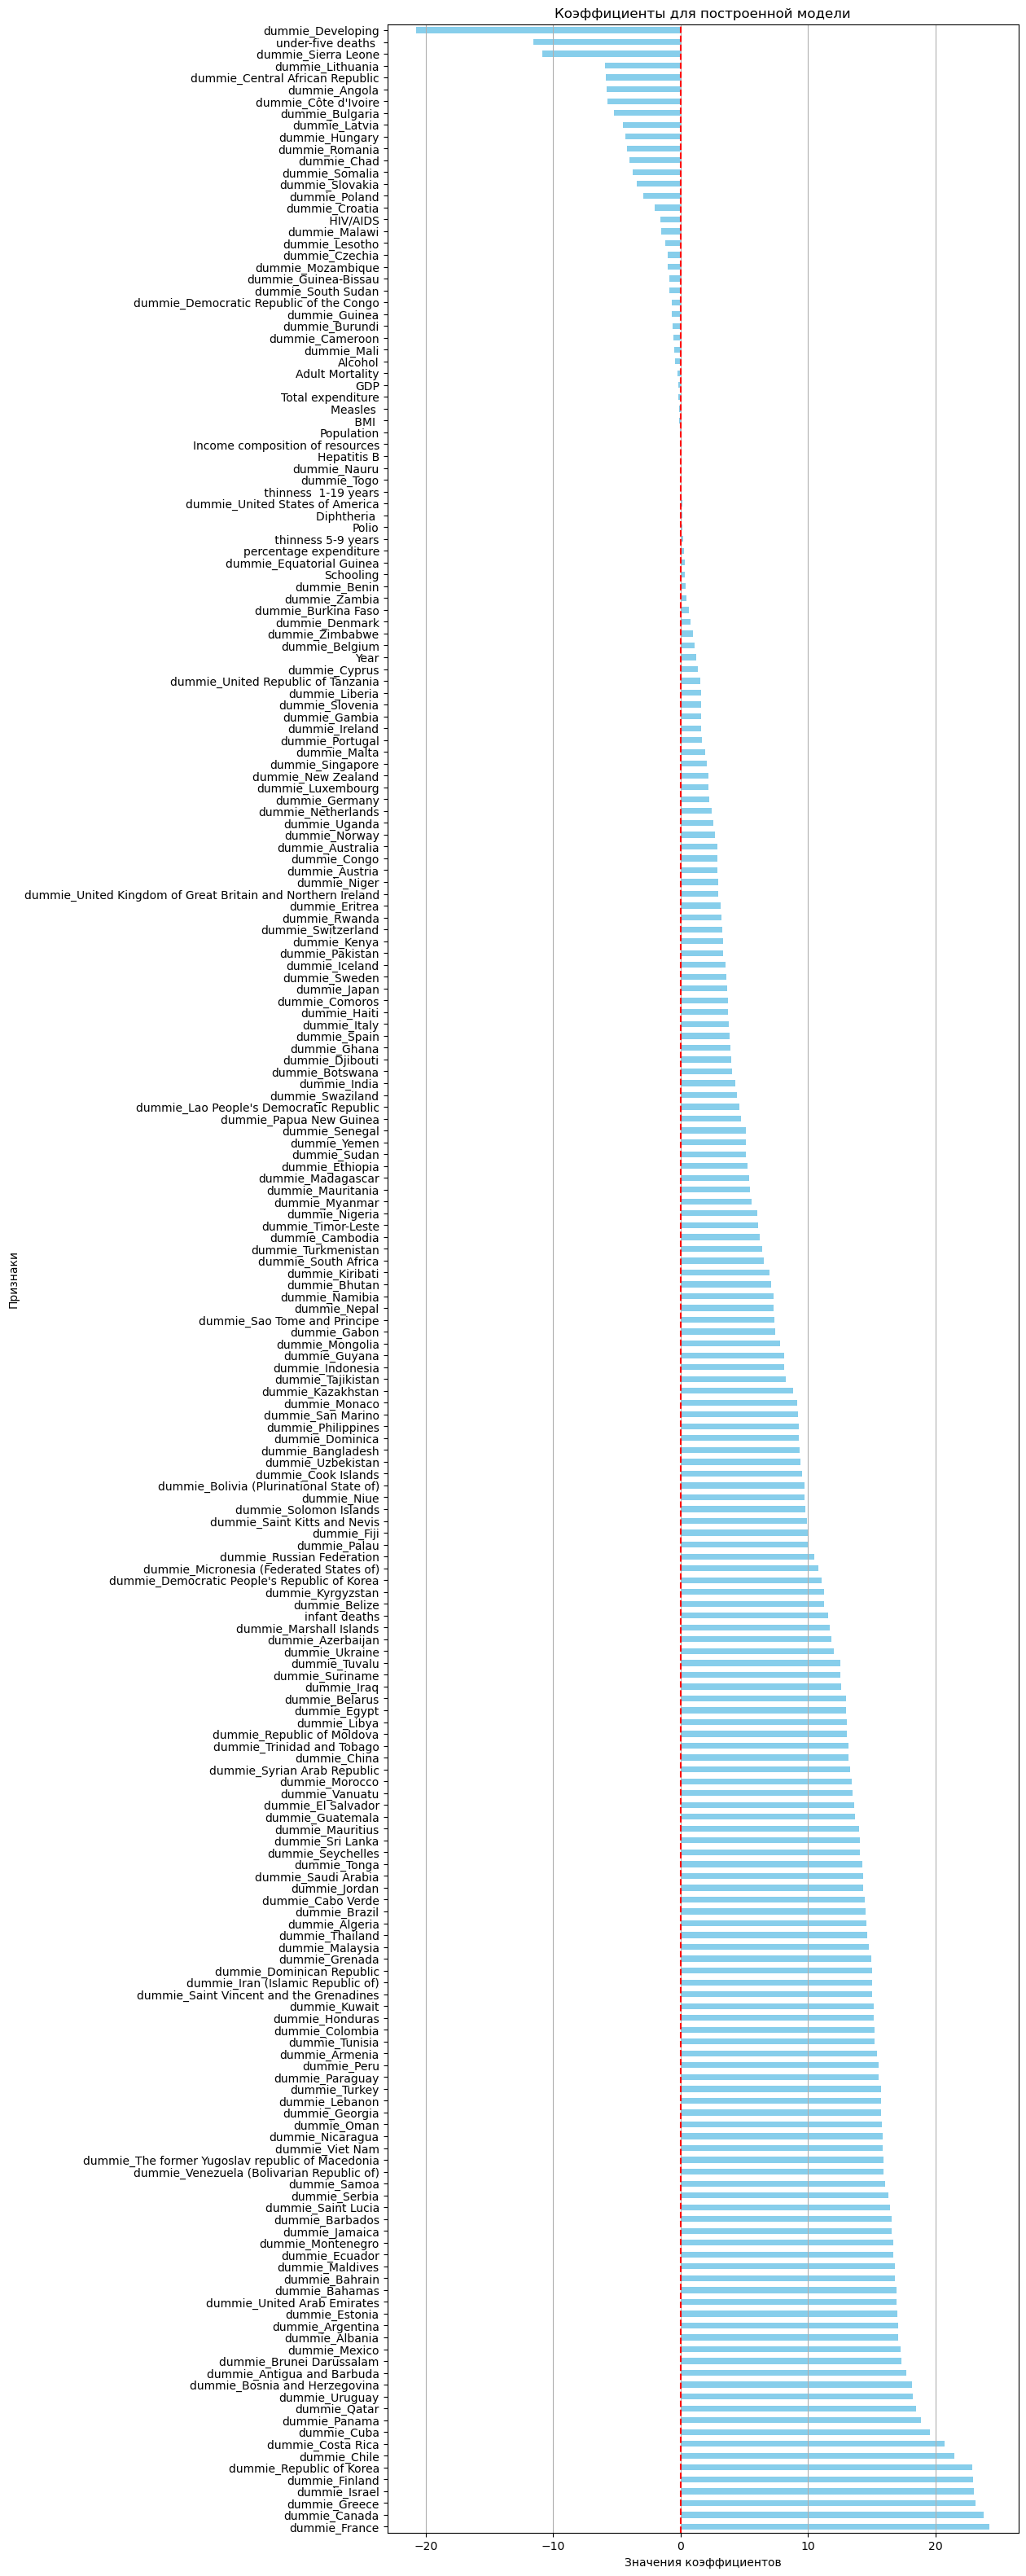

''

In [ ]:
# Создадим простую модель для обучения
model = LinearRegression()
# Обучмм модель
model.fit(X_train, y_train)
# Получим предсказания модели
y_pred = model.predict(X_test)

# Оценим результаты работы модели
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
r2= r2_score(y_true=y_test, y_pred=y_pred)

# Выведем полученные метркии
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Посмотрим на коэффициенты модели

coefficients = model.coef_

coef_df = pd.DataFrame(coefficients, X.columns, columns=['Coefficient'])

significant_coefs = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 40))
significant_coefs['Coefficient'].plot(kind='barh', color='skyblue')
plt.title('Коэффициенты для построенной модели')
plt.xlabel('Значения коэффициентов')
plt.ylabel('Признаки')
plt.axvline(x=0, color='red', linestyle='--')
plt.grid(axis='x')
plt.show()
;

Посмотрим, получится ли у нас улучшить существующую модель...

<a name="fine_tuning"></a>

## Глава №5 - Обучение модели / fine tuning

[Оглавление](#оглавление)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline


# В этои блоке Мы будем рассмаривать 3 модели:
# Ridge, Lasso, ElasticNet
# Создадим пайплайны, они будут состоять из 2х частей
# StandartScaler | model
# Затем для каждого пайплайна мы будем перебирать параметры модели с помощью GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=404)

# Создание пайплайнов
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

elastic_net_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', ElasticNet())
])

# Параметры для каждой из моделей
ridge_param_grid = {
    'model__alpha': [0.1, 1.0, 10.0],         # Весса регуляризации
    'model__max_iter': [1000, 1500, 2000],    # Число итераций
    'model__solver': ['auto', 'svd', 'cholesky', 'lsqr']
}

lasso_param_grid = {
    'model__alpha': [0.1, 1.0, 10.0],         # Весса регуляризации
    'model__max_iter': [1000, 1500, 2000],    # Число итераций
    'model__selection': ['cyclic', 'random']
}

elastic_net_param_grid = {
    'model__alpha': [0.1, 1.0, 10.0],   # Весса регуляризации
    'model__l1_ratio': [0.1, 0.5, 0.9],  # Отношения влияния регуляризаций
    'model__max_iter': [1000, 1500, 2000],    # Число итераций
    'model__selection': ['cyclic', 'random']
}

# Используем GridSearchCV для нахождений наилучших параметров модели
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=5)
lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_param_grid, cv=5)
elastic_net_grid_search = GridSearchCV(elastic_net_pipeline, elastic_net_param_grid, cv=5)

# Обучение
ridge_grid_search.fit(X_train, y_train)
lasso_grid_search.fit(X_train, y_train)
elastic_net_grid_search.fit(X_train, y_train)

# Наилучшие параметры модели
ridge_best_model = ridge_grid_search.best_estimator_
lasso_best_model = lasso_grid_search.best_estimator_
elastic_net_best_model = elastic_net_grid_search.best_estimator_

y_pred_ridge = ridge_best_model.predict(X_test)
y_pred_lasso = lasso_best_model.predict(X_test)
y_pred_elastic_net = elastic_net_best_model.predict(X_test)

# Функция для оценки
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

ridge_metrics = evaluate_model(y_test, y_pred_ridge)
lasso_metrics = evaluate_model(y_test, y_pred_lasso)
elastic_net_metrics = evaluate_model(y_test, y_pred_elastic_net)

# Вывод метрик для обученных моделей
print('Лушчие параметры для модели Ridge:', ridge_grid_search.best_params_)
print('Ridge мтерки (MAE):', ridge_metrics[0], '\n',
      'MSE:', ridge_metrics[1], '\n',
      'R-squared:', ridge_metrics[2], '\n')

print('\nЛушчие параметры для модели Lasso:', lasso_grid_search.best_params_)
print('Lasso метрики (MAE):', lasso_metrics[0], '\n',
      'MSE:', lasso_metrics[1], '\n',
      'R-squared:', lasso_metrics[2], '\n')

print('\nЛушчие параметры для модели Elastic Net:', elastic_net_grid_search.best_params_)
print('Elastic Net метрики (MAE):', elastic_net_metrics[0], '\n',
      'MSE:', elastic_net_metrics[1], '\n',
      'R-squared:', elastic_net_metrics[2], '\n')

Лушчие параметры для модели Ridge: {'model__alpha': 1.0, 'model__max_iter': 1000, 'model__solver': 'auto'}
Ridge мтерки (MAE): 1.2818637688009071 
 MSE: 4.0525951367208375 
 R-squared: 0.959350100620679 


Лушчие параметры для модели Lasso: {'model__alpha': 0.1, 'model__max_iter': 1000, 'model__selection': 'cyclic'}
Lasso метрики (MAE): 2.0433081389400307 
 MSE: 7.67648007881263 
 R-squared: 0.9230004152244061 


Лушчие параметры для модели Elastic Net: {'model__alpha': 0.1, 'model__l1_ratio': 0.1, 'model__max_iter': 1500, 'model__selection': 'random'}
Elastic Net метрики (MAE): 1.5035127591064008 
 MSE: 4.973750149501124 
 R-squared: 0.950110377105496 




<a name="Сбор_результатов_обучения"></a>

## Глава №6 - Сбор результатов обучения

[Оглавление](#оглавление)

Подведём итоги результатов:

**Регрессия Риджа (Ridge Regression)**  
- *Лучшие Параметры*:  
    - alpha: 1.0  
    - max_iter: 1000  
    - solver: 'auto'  
- *Метрики Производительности*:   
    - Средняя Абсолютная Ошибка (MAE): 1.28  
    - Средняя Квадратичная Ошибка (MSE): 4.05  
    - Коэффициент Детераминации (R-squared): 0.96  


**Лассо Регрессия (Lasso Regression)**  
- *Лучшие Параметры*:  
    - alpha: 0.1  
    - max_iter: 1000  
    - selection: 'cyclic'  
- **Метрики Производительности**:  
    - Средняя Абсолютная Ошибка (MAE): 2.04  
    - Средняя Квадратичная Ошибка (MSE): 7.68  
    - Коэффициент Детераминации (R-squared): 0.92  


**Регрессия Elastic Net**  
- *Лучшие Параметры*:
    - alpha: 0.1
    - l1_ratio: 0.1
    - max_iter: 1500
    - selection: 'random'
- *Метрики Производительности*:
    - Средняя Абсолютная Ошибка (MAE): 1.50
    - Средняя Квадратичная Ошибка (MSE): 4.97
    - Коэффициент Детераминации (R-squared): 0.95

**Описание параметров модели**

1) ***Регрессия Риджа (Ridge Regression)***  
- *alpha*:  
    - Описание: Параметр регуляризации, который контролирует величину штрафа за сложность модели. Чем больше значение alpha, тем сильнее регуляризация  
    - Влияние: Высокие значения alpha могут привести к более простым моделям (с меньшими коэффициентами), что помогает предотвратить переобучение, но может также снизить точность на обучающих данных. Низкие значения могут привести к переобучению         
- *max_iter*:  
    - Описание: Максимальное количество итераций для алгоритма оптимизации  
    - Влияние: Увеличение этого параметра может помочь, если модель не сходится. Обычно достаточно 1000 итераций для большинства задач  
- *solver*:  
    - Описание: Алгоритм, используемый для оптимизации. В данном случае используется 'auto', что позволяет библиотеке scikit-learn автоматически выбирать наиболее подходящий алгоритм в зависимости от данных  
    - Влияние: Разные алгоритмы могут иметь разные скорости сходимости и требования к памяти  


2) ***Лассо Регрессия (Lasso Regression)***  
- *alpha*:  
    - Описание: Как и в регрессии Риджа, это параметр регуляризации, который контролирует величину штрафа за сложность модели  
    - Влияние: Лассо использует L1-регуляризацию, которая может приводить к обнулению некоторых коэффициентов, тем самым выполняя отбор признаков. Это делает модель более интерпретируемой и помогает избежать переобучения  
- *max_iter*:  
    - Описание: Максимальное количество итераций для алгоритма оптимизации  
    - Влияние: Увеличение этого параметра может помочь в случае медленной сходимости модели   
- *selection*:   
    - Описание: Метод выбора координат для обновления в процессе оптимизации. Может принимать значения 'cyclic' (циклический) или 'random'   
    - Влияние: 'cyclic' обновляет координаты по порядку, тогда как 'random' выбирает координаты случайным образом. Это может влиять на скорость сходимости и стабильность решения  


3) ***Регрессия Elastic Net***  
- *alpha*:  
    - Описание: Параметр регуляризации, аналогичный тому, что используется в Ridge и Lasso  
    - Влияние: Elastic Net сочетает L1 и L2-регуляризацию. Значение alpha контролирует общий уровень регуляризации  
- *l1_ratio*:  
    - Описание: Соотношение между L1 и L2-регуляризацией. Значение l1_ratio=1 соответствует Лассо (только L1), а l1_ratio=0 соответствует Риджу (только L2)  
    - Влияние: Это позволяет вам настраивать баланс между отбором признаков (L1) и сглаживанием (L2). Значения между 0 и 1 позволяют комбинировать оба подхода  
- *max_iter*:  
    - Описание: Максимальное количество итераций для алгоритма оптимизации  
    - Влияние: Как и в других моделях, увеличение этого параметра может помочь в случае медленной сходимости  
- *selection*:  
    - Описание: Метод выбора координат для обновления в процессе оптимизации, аналогично параметру в Лассо   
    - Влияние: Может влиять на скорость сходимости и стабильность решения  

''

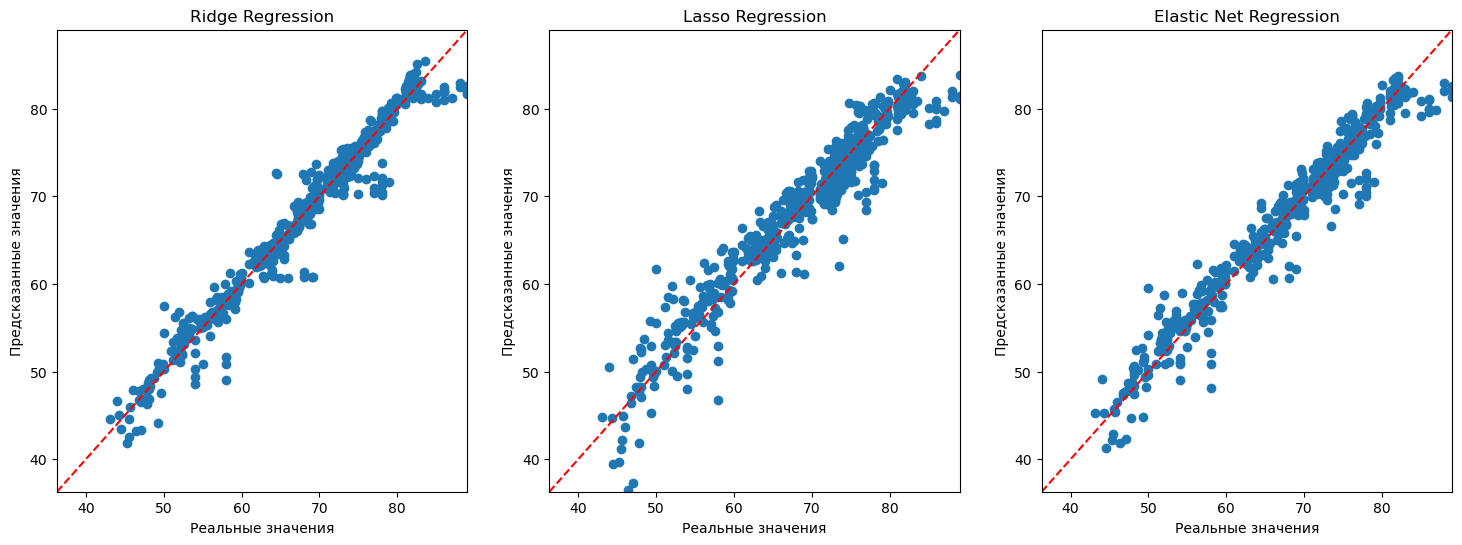

In [ ]:
plt.figure(figsize=(18, 6))

# Ridge Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_ridge)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Линия идеальных предсказаний
plt.title('Ridge Regression')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())

# Lasso Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_lasso)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Линия идеальных предсказаний
plt.title('Lasso Regression')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())

# Elastic Net Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_elastic_net)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Линия идеальных предсказаний
plt.title('Elastic Net Regression')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
;

<a name="Выводы_и_улучшение"></a>

## Глава №7 - Выводы и улучшение

[Оглавление](#оглавление)

Следующие Шаги
- **Валидация Модели**: Рассмотрите возможность валидации ваших моделей с использованием дополнительных наборов данных или методов кросс-валидации для обеспечения надежности  
- **Анализ Важности Признаков**: Проанализируйте важность признаков или коэффициенты из вашей модели с наилучшей производительностью, чтобы понять, какие признаки вносят наибольший вклад в предсказания  
- **Дальнейшая Настройка**: При желании вы можете дополнительно настроить гиперпараметры или исследовать дополнительные техники регуляризации или модели  
- **Развертывание**: Если вы удовлетворены производительностью модели, рассмотрите возможность ее развертывания для реальных предсказаний  
